# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

!pip install citipy

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carutapera
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | puerto deseado
Processing Record 13 of Set 1 | tinajo
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | bermejillo
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | sao joao da barra
Processing Record 21 of Set 1 | bredasdorp
Processing Re

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [12]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carutapera,-1.1950,-46.0200,25.20,82,8,2.50,BR,1701314322
1,thompson,55.7435,-97.8558,-17.27,82,95,3.31,CA,1701313756
2,grytviken,-54.2811,-36.5092,3.24,89,72,0.92,GS,1701314322
3,adamstown,-25.0660,-130.1015,21.57,77,100,4.75,PN,1701314323
4,dudinka,69.4058,86.1778,-17.99,100,100,0.66,RU,1701313496


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,25.20,82,8,2.50,BR,1701314322
1,thompson,55.7435,-97.8558,-17.27,82,95,3.31,CA,1701313756
2,grytviken,-54.2811,-36.5092,3.24,89,72,0.92,GS,1701314322
3,adamstown,-25.0660,-130.1015,21.57,77,100,4.75,PN,1701314323
4,dudinka,69.4058,86.1778,-17.99,100,100,0.66,RU,1701313496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

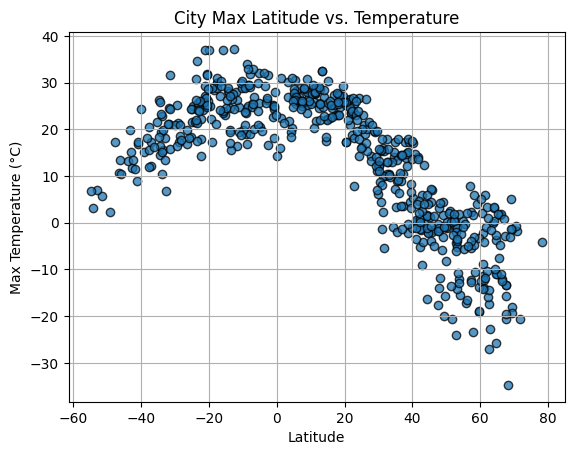

In [15]:
# Incorporate the other graph properties

# Create the scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
# # Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

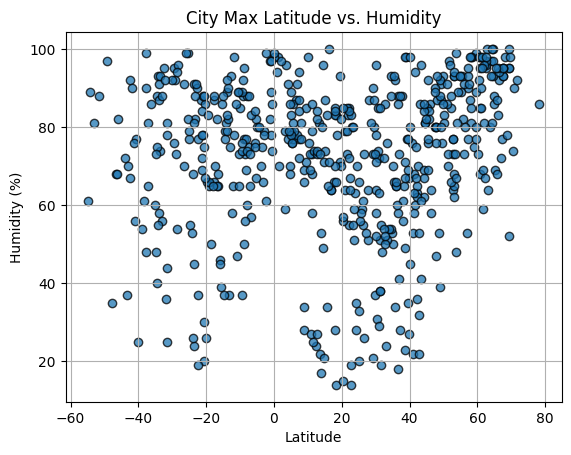

In [16]:
# Build the scatter plots for latitude vs. humidity
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o",
            edgecolors="black",
            alpha=0.75)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

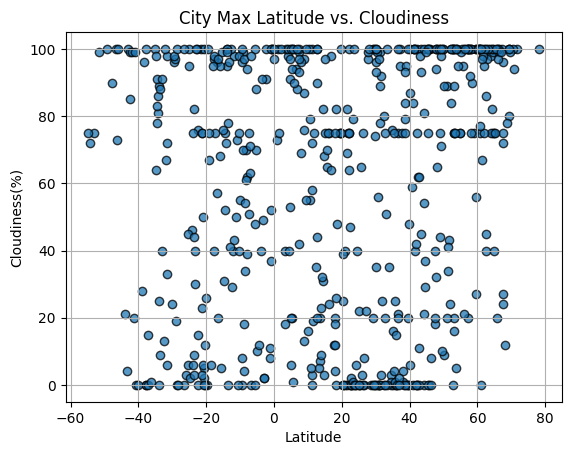

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            marker="o",
            edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# # Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

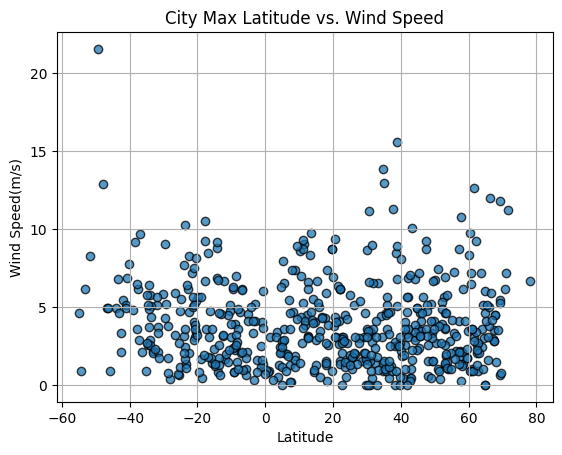

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker="o",
            edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)

    # Calculate the line of best fit
    line_of_best_fit = slope * x_values + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black')

    # Plot the line of best fit
    plt.plot(x_values, line_of_best_fit, color='red', label='Linear Regression')

    # Labeling the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print the R-squared value above the graph
    print(f"R-squared: {r_value**2:.2f}")
    
 

    # Add equation of the line inside the graph
    equation_x = 0.5 * (min(x_values) + max(x_values))
    equation_y = min(y_values) + 5  # Adjust this value to change the vertical position of the equation text
    equation_text = f"Equation: y = {slope:.2f}x + {intercept:.2f}"
    plt.text(equation_x, equation_y, equation_text, fontsize=12, ha='center', va='center', color='red')

    # Show the plot
    plt.legend()
    plt.grid(True)
    plt.show()


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thompson,55.7435,-97.8558,-17.27,82,95,3.31,CA,1701313756
4,dudinka,69.4058,86.1778,-17.99,100,100,0.66,RU,1701313496
7,bethel,41.3712,-73.4140,0.36,58,100,2.57,US,1701313725
8,haiku-pauwela,20.9219,-156.3051,26.25,79,40,3.09,US,1701313773
9,olonkinbyen,70.9221,-8.7187,-1.82,90,94,7.15,SJ,1701313724


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carutapera,-1.1950,-46.0200,25.20,82,8,2.50,BR,1701314322
2,grytviken,-54.2811,-36.5092,3.24,89,72,0.92,GS,1701314322
3,adamstown,-25.0660,-130.1015,21.57,77,100,4.75,PN,1701314323
5,waitangi,-43.9535,-176.5597,13.23,72,21,4.92,NZ,1701314323
6,margaret river,-33.9500,115.0667,22.92,58,89,5.79,AU,1701314323


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.77


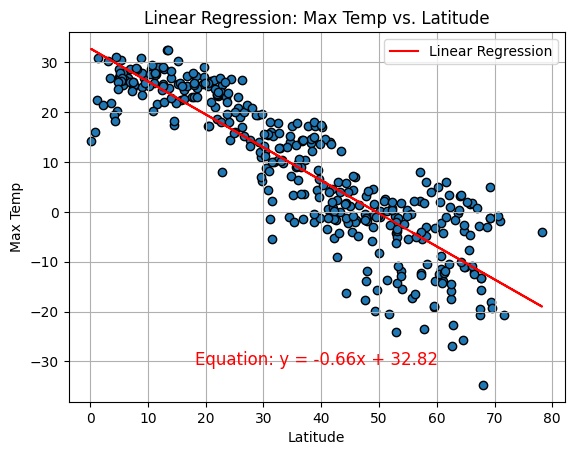

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Max Temp'].values

# Call the function
linear_regression_plot(x_values, y_values, 'Latitude', 'Max Temp', 'Linear Regression: Max Temp vs. Latitude')



R-squared: 0.39


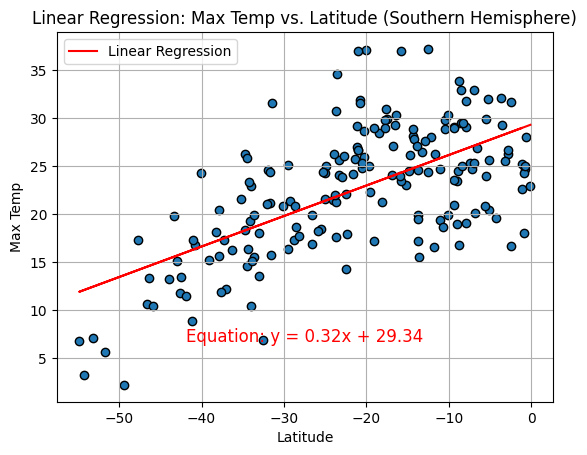

In [24]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df['Lat'].values
y_values_southern = southern_hemi_df['Max Temp'].values

# Call the function for Southern Hemisphere
linear_regression_plot(x_values_southern, y_values_southern, 'Latitude', 'Max Temp', 'Linear Regression: Max Temp vs. Latitude (Southern Hemisphere)')

**Discussion about the linear relationship:

Northern Hemisphere:

When you go north from the equator, the maximum temperature tends to decrease.
The number -0.6112 tells us there's a negative relationship. In simple terms, as you move towards the North Pole, it gets colder.
Southern Hemisphere:

When you go south from the equator, the maximum temperature tends to increase.
The number 0.7042 tells us there's a positive relationship. In simple terms, as you move towards the South Pole, it gets warmer.
So, in summary, the numbers help us see that temperature changes are related to how far you are from the equator. Closer to the poles (either north or south), it tends to be colder, and closer to the equator, it tends to be warmer.

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.08


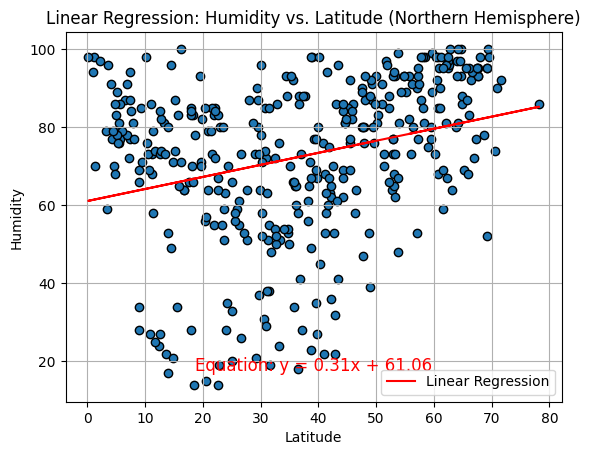

In [25]:
# Northern Hemisphere
x_values_northern_hemi_humidity = northern_hemi_df['Lat'].values
y_values_northern_hemi_humidity = northern_hemi_df['Humidity'].values

# Call the function for Northern Hemisphere Humidity vs. Latitude
linear_regression_plot(x_values_northern_hemi_humidity, y_values_northern_hemi_humidity, 'Latitude', 'Humidity', 'Linear Regression: Humidity vs. Latitude (Northern Hemisphere)')

R-squared: 0.01


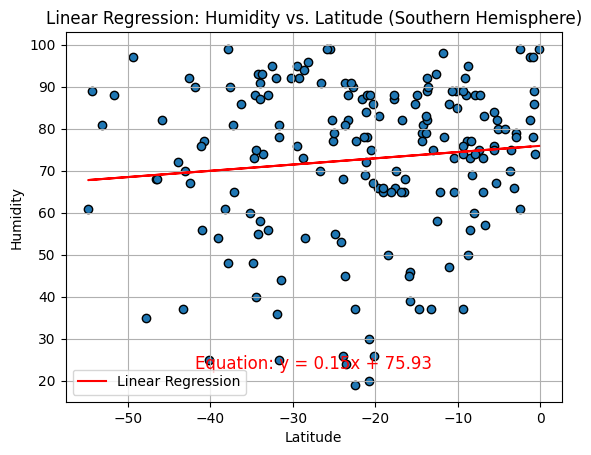

In [26]:
# Southern Hemisphere
x_values_southern_hemi_humidity = southern_hemi_df['Lat'].values
y_values_southern_hemi_humidity = southern_hemi_df['Humidity'].values



# Call the function for Southern Hemisphere Humidity vs. Latitude
linear_regression_plot(x_values_southern_hemi_humidity, y_values_southern_hemi_humidity, 'Latitude', 'Humidity', 'Linear Regression: Humidity vs. Latitude (Southern Hemisphere)')

**Discussion about the linear relationship:
Northern Hemisphere:

The number -0.01674 tells us there's a tiny connection between humidity and how far north you are.
But it's so close to zero that it's not a strong link. So, latitude (how far north you are) doesn't really tell us much about humidity in the Northern Hemisphere.
Southern Hemisphere:

The number 0.002411 tells us there's a tiny connection between humidity and how far south you are.
Again, it's really close to zero, so latitude (how far south you are) doesn't give us much insight into humidity in the Southern Hemisphere either.

The numbers show that how far north or south you are doesn't strongly predict humidity. There's a small connection, but other things (maybe like local weather patterns or altitude) likely have a bigger impact on how humid it feels.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.05


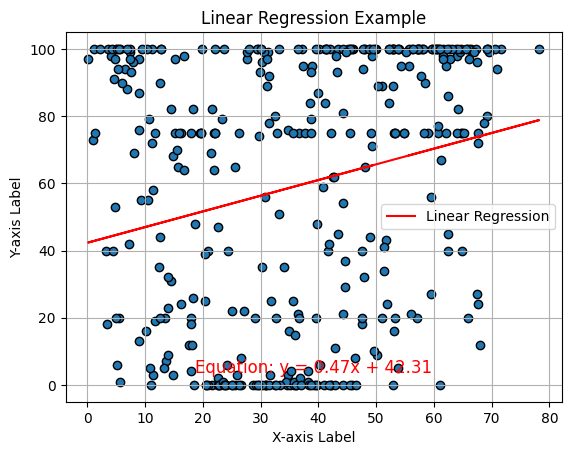

In [29]:
# Northern Hemispherex_data
x_data = northern_hemi_df['Lat'].values
y_data = northern_hemi_df['Cloudiness'].values

linear_regression_plot(x_data, y_data, 'X-axis Label', 'Y-axis Label', 'Linear Regression Example')

R-squared: 0.05


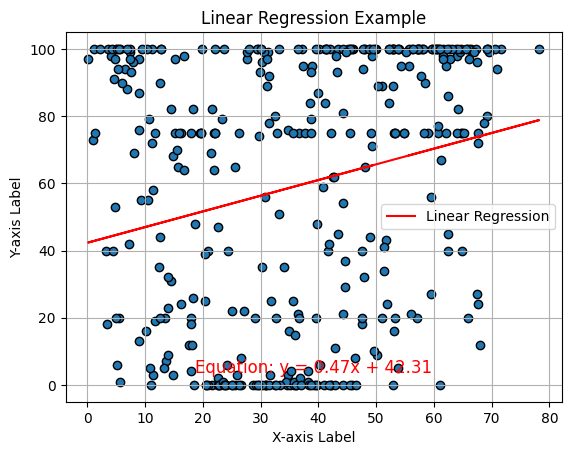

In [30]:
# Southern Hemisphere
# Call the function
linear_regression_plot(x_data, y_data, 'X-axis Label', 'Y-axis Label', 'Linear Regression Example')

**Discussion about the linear relationship:
Northern Hemisphere:

The number -0.06386 says there's a tiny connection between how cloudy it is and how far north you are.
But, it's so small that it's not a strong link. So, just knowing how far north you are doesn't really tell us much about cloudiness in the Northern Hemisphere.
Southern Hemisphere:

The number -0.1552 suggests a tiny connection between how cloudy it is and how far south you are.
Like before, it's really close to zero, meaning how far south you are doesn't give us much info about cloudiness in the Southern Hemisphere.
In Simple Terms:
The numbers hint that knowing how far north or south you are doesn't strongly predict how cloudy it is. There's a small link, but other things (maybe local weather patterns or altitude) probably matter more for predicting cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.00


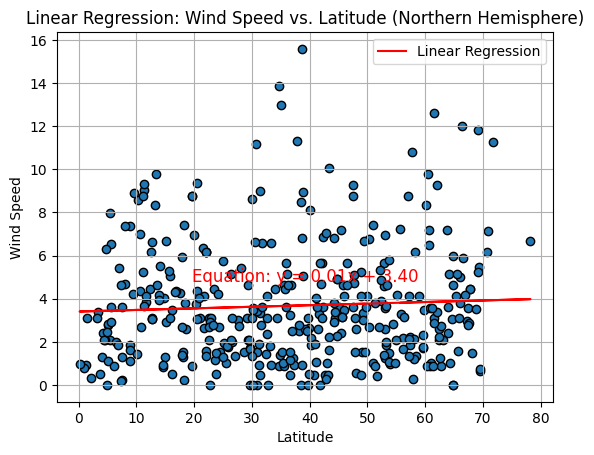

In [31]:
# Northern Hemisphere
x_values_northern_hemi_wind = northern_hemi_df['Lat'].values
y_values_northern_hemi_wind = northern_hemi_df['Wind Speed'].values

# Calculate linear regression
slope, intercept, r_value, _, _ = linregress(x_values_northern_hemi_wind, y_values_northern_hemi_wind)

# Add equation of the line inside the graph
equation_x = 0.5 * (min(x_values_northern_hemi_wind) + max(x_values_northern_hemi_wind))
equation_y = 12  # Adjust this value to change the vertical position of the equation text
equation_text = f"Equation: y = {slope:.2f}x + {intercept:.2f}"

# Call the function for Northern Hemisphere Wind Speed vs. Latitude
linear_regression_plot(x_values_northern_hemi_wind, y_values_northern_hemi_wind, 'Latitude', 'Wind Speed', 'Linear Regression: Wind Speed vs. Latitude (Northern Hemisphere)')

R-squared: 0.09


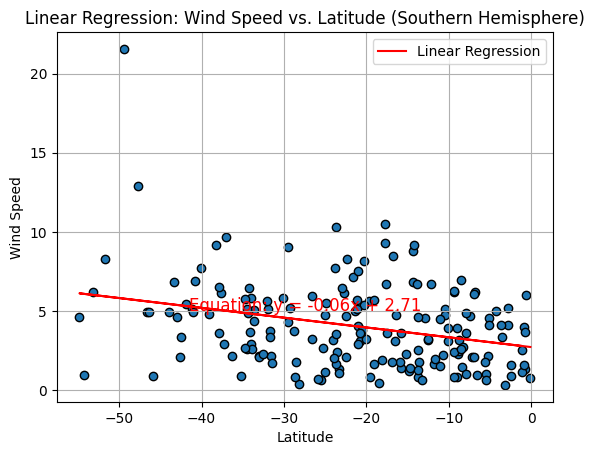

In [32]:
# Southern Hemisphere
x_values_southern_hemi_wind = southern_hemi_df['Lat'].values
y_values_southern_hemi_wind = southern_hemi_df['Wind Speed'].values

# Call the function for Southern Hemisphere Wind Speed vs. Latitude
linear_regression_plot(x_values_southern_hemi_wind, y_values_southern_hemi_wind, 'Latitude', 'Wind Speed', 'Linear Regression: Wind Speed vs. Latitude (Southern Hemisphere)')

**Discussion about the linear relationship:** 
Northern Hemisphere:

The number -0.1554 tells us there's a slight connection between how fast the wind is blowing and how far north you are.
However, it's a weak link. So, just knowing how far north you are doesn't really tell us much about wind speed in the Northern Hemisphere.
Southern Hemisphere:

The number -0.1535 suggests a small connection between wind speed and how far south you are.
Like in the north, it's a weak connection. So, being in the south doesn't strongly predict wind speed.
In Simple Terms:
The numbers suggest that knowing your location (north or south) doesn't strongly predict how fast the wind is blowing. Other things like local weather conditions and geography probably matter more for predicting wind speed.